# 📊 **Análisis del Mercado Laboral Argentino (2017–2025)**
> Por ***Alejo Trenti***

 [GitHub](https://github.com/alejotrenti/) - [LinkedIn](https://www.linkedin.com/in/alejo-trenti-99aa572bb/) - [Portfolio](https://alejo-trenti.vercel.app/)



## Introducción, objetivos, y preguntas

Descripcion breve y explicativa sobre el proyecto del mercado laboral argentino

El presente proyecto aborda el análisis del **mercado laboral argentino** a partir de datos oficiales de la **Encuesta Permanente de Hogares (EPH)**, cubriendo el período comprendido entre **2017 y 2025**. El objetivo principal es examinar la evolución de los **indicadores laborales fundamentales**, identificar **tendencias de largo plazo** y analizar el efecto de shocks macroeconómicos sobre el comportamiento del empleo.

Se emplean técnicas de **análisis exploratorio de datos**, **visualización de series temporales** y análisis comparativo entre períodos para detectar patrones, anomalías y cambios estructurales en variables como la tasa de actividad, empleo y desocupación.

El proyecto está orientado a demostrar competencias en **limpieza de datos, análisis estadístico descriptivo, interpretación de resultados y comunicación de insights**, con un enfoque aplicado y reproducible, pensado para su presentación en un portfolio de **Data Science**.

> **Preguntas que guía el análisis**

* ¿Cómo evolucionaron los principales indicadores laborales entre 2017 y 2025?
* ¿Qué cambios se observan durante períodos de crisis económicas?
* ¿Existen tendencias de recuperación o deterioro sostenido en el empleo?

## Fuente de datos y descripción del dataset


### **Descripción sobre los datos obtenidos:**

Los datos fueron extraidos del archivo *"Mercado de trabajo. Tasas e indicadores socioeconómicos (EPH). Primer trimestre 2017 a tercer trimestre de 2025"*.

Los datos originales se encontraban en formato ancho (wide), típico de publicaciones estadísticas. Para facilitar el análisis exploratorio, la visualización y el modelado, se transformaron a un formato tidy long, donde cada fila representa un indicador laboral observado en un trimestre específico.



> **Fuente:**  INDEC, Instituto Nacional de Estadistica y Censos de la REPUBLICA ARGENTINA. (s. f.). INDEC: Instituto Nacional de Estadística y Censos de la República Argentina. https://www.indec.gob.ar/indec/web/Nivel4-Tema-4-31-58


## Carga y preparación de los datos

Contenido:

* Importación del Excel.
* Revisión inicial (`head`, `info`, `describe`).
* Limpieza:

  * Tipos de datos
  * Nombres de columnas
  * Valores faltantes (si hay)
* Transformaciones necesarias (fechas, trimestres, etc.).

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')


df = pd.read_excel("/content/drive/MyDrive/Data/MERCADO LABORAL EN LIMPIO.xlsx")

# df.info()
# df.head(n=10)
# df.describe()
df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['anio', 'trimestre', 'indicador', 'valor'], dtype='object')

## Análisis Exploratorio de Datos (EDA)

Objetivo: encontrar patrones y tendencias.

### Evolución temporal de los principales indicadores

En esta sección se analiza la evolución temporal de los principales indicadores del mercado laboral argentino entre 2017 y 2025. El objetivo es identificar tendencias generales, períodos de estabilidad e inestabilidad, y posibles quiebres asociados a distintos contextos macroeconómicos, a partir del comportamiento de indicadores como la tasa de actividad, empleo y desocupación.


In [14]:
# Creamos variable de tiempo llamada periodo, para que los gráficos queden correctamente visualizados
# Filtramos dataset para solo los indicadores que mas nos importan, para asi no sobresaturar el gráfico
df["periodo"] = df["anio"].astype(str) + " T" + df["trimestre"].astype(str)

df = df.sort_values(["anio", "trimestre"])

indicadores_principales = [
    "actividad",
    "empleo",
    "desocupacion"
]

df_principal = df[df["indicador"].isin(indicadores_principales)]

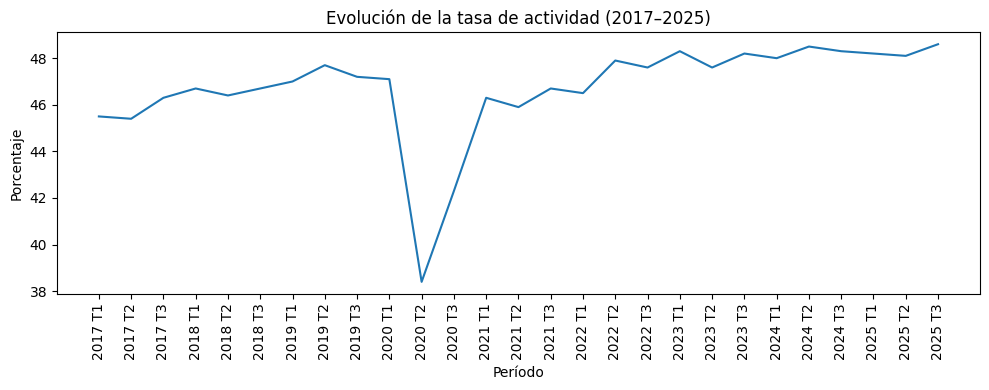

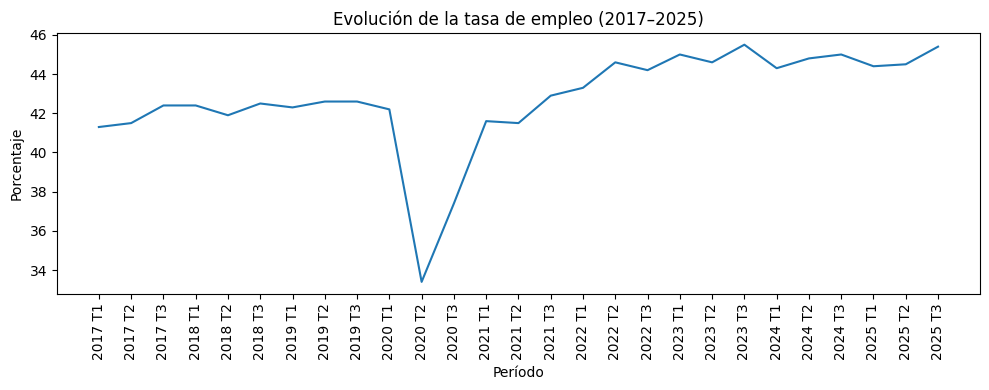

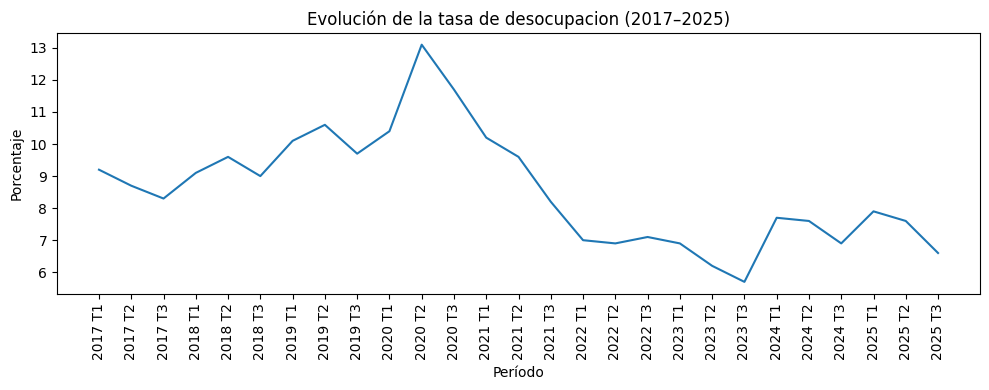

In [18]:
for ind in indicadores_principales:
    subset = df_principal[df_principal["indicador"] == ind]

    plt.figure(figsize=(10, 4))
    plt.plot(subset["periodo"], subset["valor"])
    plt.title(f"Evolución de la tasa de {ind} (2017–2025)")
    plt.xlabel("Período")
    plt.ylabel("Porcentaje")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


> ¿ Que sucedió en la evolucion de los indicadores en el mercado laboral?

Entre 2017 y 2025, el mercado laboral argentino fue muy sensible a los shocks macroeconómicos, especialmente a la pandemia de COVID-19. En el segundo trimestre de 2020 hubo una brusca caída de la actividad y el empleo, junto con un fuerte aumento del desempleo.

Desde 2021 comenzó una recuperación sostenida, que llevó la desocupación a mínimos históricos hacia 2023. Sin embargo, a fines de 2024 y durante 2025 se observó un estancamiento del empleo y un leve repunte del desempleo, señalando una menor capacidad del mercado para absorber mano de obra.

Así, tras la recuperación postpandemia, el mercado laboral muestra hacia 2025 signos de fragilidad estructural, requiriendo un análisis más detallado por sector, tipo de empleo y región.

###  Variación intertrimestral de los indicadores

Este enfoque permite identificar períodos de cambios abruptos, aceleraciones y desaceleraciones en el empleo, la actividad y la desocupación.

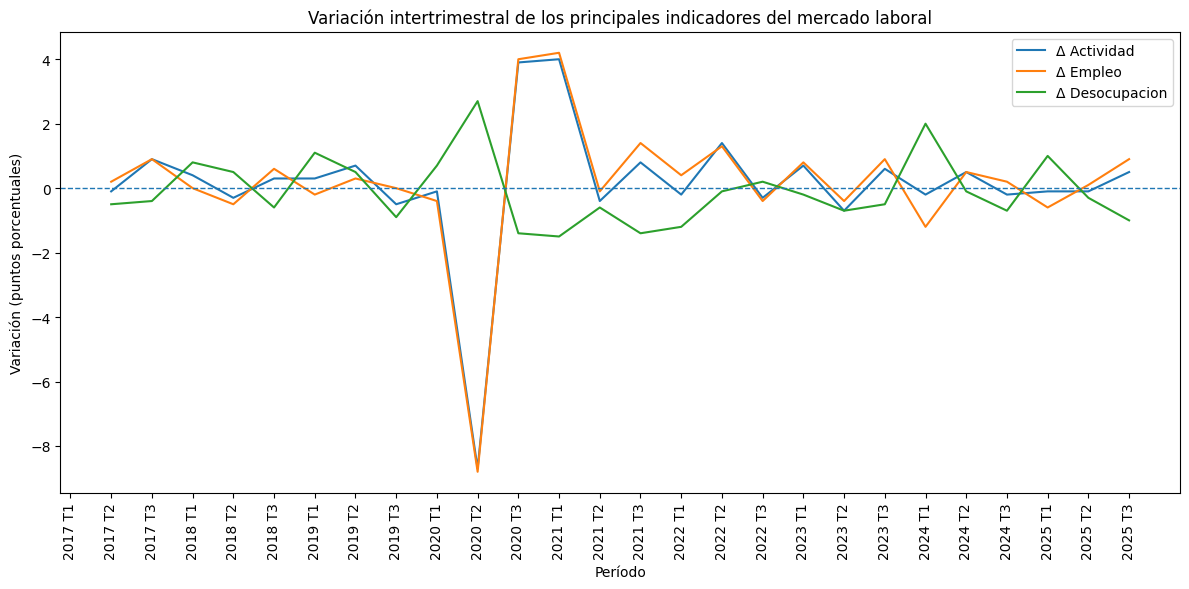

In [19]:
import matplotlib.pyplot as plt

# Copia del dataframe para no modificar el original
df_var = df_principal.copy()

# Ordenamos por indicador y período
df_var = df_var.sort_values(["indicador", "periodo"])

# Calculamos la variación intertrimestral
df_var["variacion"] = df_var.groupby("indicador")["valor"].diff()

plt.figure(figsize=(12, 6))

for ind in indicadores_principales:
    subset = df_var[df_var["indicador"] == ind]
    plt.plot(
        subset["periodo"],
        subset["variacion"],
        label=f"Δ {ind.capitalize()}"
    )

plt.axhline(0, linestyle="--", linewidth=1)
plt.title("Variación intertrimestral de los principales indicadores del mercado laboral")
plt.xlabel("Período")
plt.ylabel("Variación (puntos porcentuales)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


El mercado laboral argentino mostró una severa contracción en el segundo trimestre de 2020 a causa de la pandemia, con caídas históricas en las tasas de actividad y empleo superiores a 8 puntos porcentuales y un aumento abrupto del desempleo. Tras una recuperación sostenida que devolvió los indicadores a niveles prepandemia hacia 2021, los datos más recientes para el tercer trimestre de 2025 señalan un desempleo del 6.6%, su nivel más bajo desde finales de 2024, según la Encuesta Permanente de Hogares (EPH) del INDEC.

###  Relación entre la tasa de empleo y la tasa de desocupación

Con el fin de explorar la relación entre los principales indicadores del mercado laboral, se analiza el vínculo entre la tasa de empleo y la tasa de desocupación mediante un gráfico de dispersión.

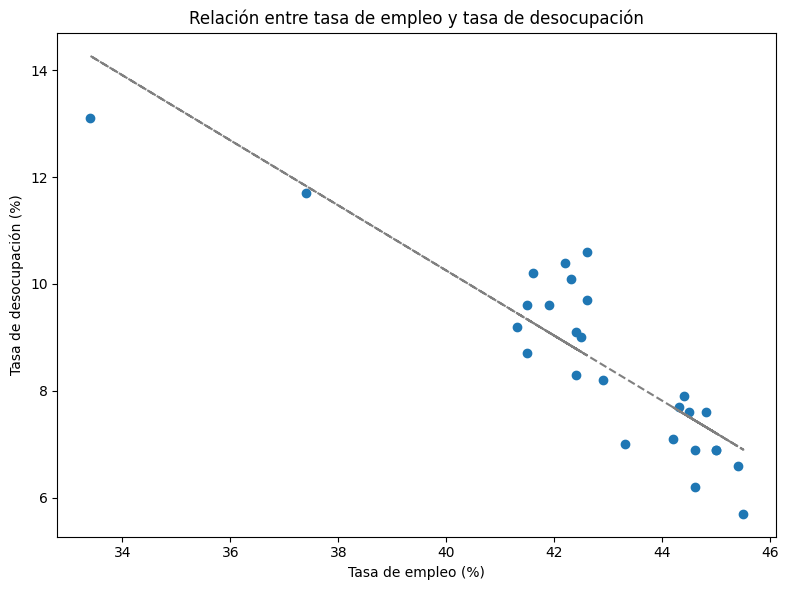

In [34]:

# Separamos empleo y desocupación
df_empleo = df_principal[df_principal["indicador"] == "empleo"][["periodo", "valor"]]
df_desocup = df_principal[df_principal["indicador"] == "desocupacion"][["periodo", "valor"]]

# Unimos por período
df_relacion = df_empleo.merge(
    df_desocup,
    on="periodo",
    suffixes=("_empleo", "_desocupacion")
)

# Variables
x = df_relacion["valor_empleo"]
y = df_relacion["valor_desocupacion"]

# Cálculo de la línea de tendencia (y = m*x + b)
m, b = np.polyfit(x, y, 1)
y_tendencia = m * x + b

plt.figure(figsize=(8, 6))

# Scatter
plt.scatter(x, y)

# Línea de tendencia
plt.plot(x, y_tendencia, linestyle="--", color="gray")

plt.title("Relación entre tasa de empleo y tasa de desocupación")
plt.xlabel("Tasa de empleo (%)")
plt.ylabel("Tasa de desocupación (%)")
plt.tight_layout()
plt.show()


### Tendencia de los indicadores mediante medias móviles

Con el objetivo de identificar la tendencia subyacente del mercado laboral argentino, se calculan medias móviles de cuatro trimestres para los principales indicadores. Este procedimiento permite suavizar las variaciones de corto plazo y facilita la identificación de cambios persistentes en la dinámica del empleo y la actividad.

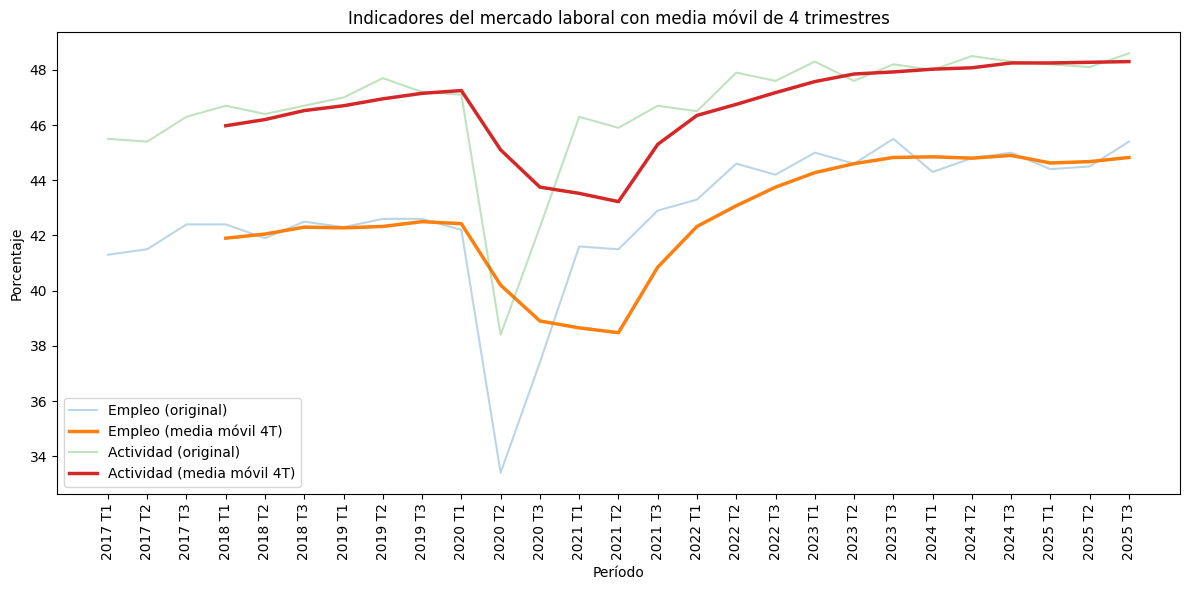

In [35]:
import matplotlib.pyplot as plt

# Filtramos empleo y actividad
df_mm = df_principal[
    df_principal["indicador"].isin(["empleo", "actividad"])
].copy()

# Ordenamos correctamente
df_mm = df_mm.sort_values(["indicador", "periodo"])

# Calculamos media móvil de 4 trimestres
df_mm["media_movil_4t"] = (
    df_mm.groupby("indicador")["valor"]
    .rolling(window=4)
    .mean()
    .reset_index(level=0, drop=True)
)

plt.figure(figsize=(12, 6))

for ind in ["empleo", "actividad"]:
    subset = df_mm[df_mm["indicador"] == ind]

    # Serie original (suave)
    plt.plot(
        subset["periodo"],
        subset["valor"],
        alpha=0.3,
        label=f"{ind.capitalize()} (original)"
    )

    # Media móvil
    plt.plot(
        subset["periodo"],
        subset["media_movil_4t"],
        linewidth=2.5,
        label=f"{ind.capitalize()} (media móvil 4T)"
    )

plt.title("Indicadores del mercado laboral con media móvil de 4 trimestres")
plt.xlabel("Período")
plt.ylabel("Porcentaje")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Los resultados muestran una caída abrupta de la tendencia durante 2020, seguida de una recuperación sostenida entre 2021 y 2023. Sin embargo, hacia 2024 y 2025 la media móvil del empleo se estabiliza, lo que refuerza la evidencia de un proceso de desaceleración del mercado laboral. Este comportamiento sugiere que, si bien los niveles se mantienen relativamente elevados, el crecimiento del empleo ha perdido dinamismo en los últimos períodos.

### Comparación del mercado laboral pre y post pandemia

Para evaluar si la pandemia generó cambios estructurales en el mercado laboral argentino, se comparan las distribuciones de la tasa de empleo y la tasa de desocupación en los períodos pre pandemia (2017–2019) y post pandemia (2021–2025)

In [39]:
# Filtramos indicadores
df_box = df_principal[
    df_principal["indicador"].isin(["empleo", "desocupacion"])
].copy()

# Clasificamos períodos
def clasificar_periodo(p):
    anio = int(p[:4])
    if anio <= 2019:
        return "Pre pandemia"
    elif anio >= 2021:
        return "Post pandemia"
    else:
        return None

df_box["periodo_pandemia"] = df_box["periodo"].apply(clasificar_periodo)

# Excluimos 2020
df_box = df_box.dropna(subset=["periodo_pandemia"])


---


📦 Boxplot: Tasa de empleo



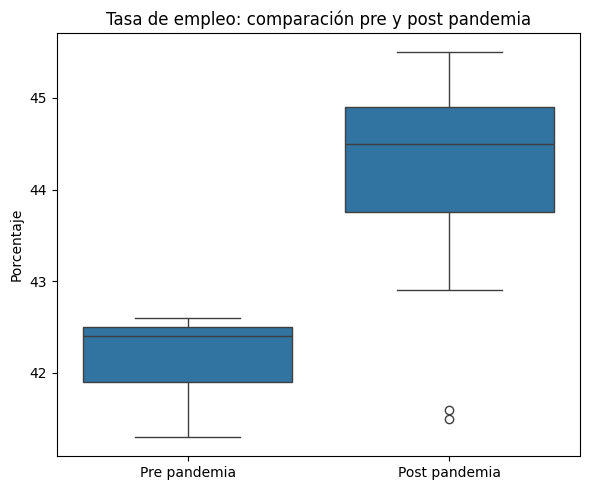

In [40]:
plt.figure(figsize=(6, 5))

sns.boxplot(
    data=df_box[df_box["indicador"] == "empleo"],
    x="periodo_pandemia",
    y="valor"
)

plt.title("Tasa de empleo: comparación pre y post pandemia")
plt.xlabel("")
plt.ylabel("Porcentaje")
plt.tight_layout()
plt.show()



---

📦 Boxplot: Tasa de desocupación

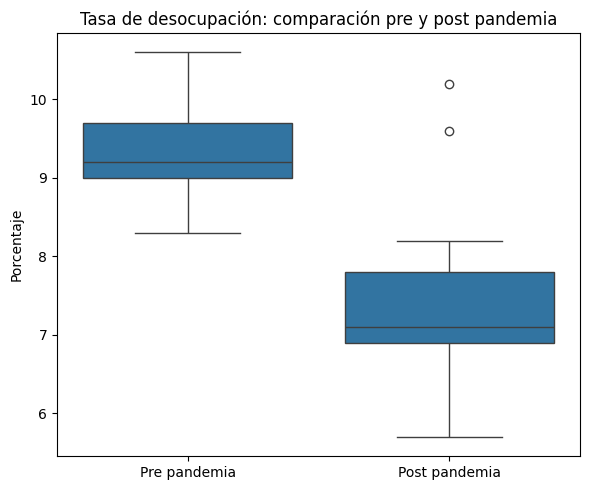

In [41]:
plt.figure(figsize=(6, 5))

sns.boxplot(
    data=df_box[df_box["indicador"] == "desocupacion"],
    x="periodo_pandemia",
    y="valor"
)

plt.title("Tasa de desocupación: comparación pre y post pandemia")
plt.xlabel("")
plt.ylabel("Porcentaje")
plt.tight_layout()
plt.show()


## Conclusión general del proyecto

En este proyecto se analizó la evolución del mercado laboral argentino entre 2017 y 2025 a partir de los principales indicadores de la EPH, con el objetivo de identificar tendencias, cambios y relaciones relevantes a lo largo del tiempo.

El análisis muestra con claridad el fuerte impacto de la pandemia en 2020, cuando se produjo una caída abrupta del empleo y de la actividad, junto con un aumento de la desocupación. En los años siguientes se observa una recuperación gradual que permitió alcanzar niveles de empleo elevados hacia 2023. Sin embargo, los resultados también indican que esta recuperación perdió impulso en los últimos períodos, con señales de estancamiento del empleo y una menor reducción de la desocupación hacia 2024 y 2025.

Asimismo, se confirma la relación inversa entre empleo y desocupación, aunque dicha relación se vio alterada durante los momentos de mayor crisis. La comparación entre los períodos pre y post pandemia sugiere que el mercado laboral no volvió exactamente a la situación previa, sino que presenta una nueva dinámica, con mejoras en los niveles promedio pero mayor inestabilidad.

En conjunto, el proyecto permite concluir que el mercado laboral argentino logró recuperarse del shock inicial de la pandemia, aunque persisten desafíos que limitan una mejora sostenida en el tiempo, dejando abiertas líneas de análisis más profundas para futuros trabajos.

